In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
num_examples = 50
X = np.array([np.linspace(-2,4,num_examples), np.linspace(-6,6, num_examples)])
X += np.random.randn(2, num_examples)
x, y = X
X_with_bias = np.array([(1., a) for a in x]).astype(np.float32)

In [3]:
losses = []
training_steps = 50
learning_rate = 0.002

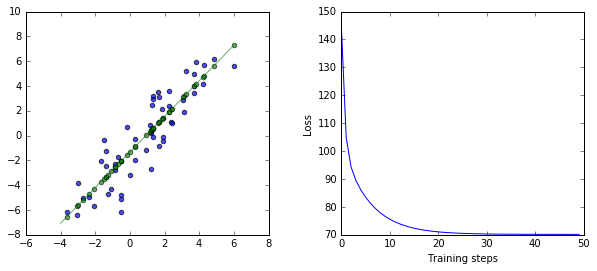

In [4]:
with tf.Session() as sess:
    #set up all the tensors, variables and operationd of the model
    input = tf.constant(X_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32))
    weights = tf.Variable(tf.random_normal([2,1], 0, 0.1))
    
    tf.initialize_all_variables().run()
    
    yhat = tf.matmul(input, weights)
    yerror = tf.sub(yhat, target)
    loss = tf.nn.l2_loss(yerror)
    
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    for _ in range(training_steps):
        #this is the main loop of optimization
        update_weights.run()
        losses.append(loss.eval())
    # Training is finish and save variables for graphs
    betas = weights.eval()
    yhat = yhat.eval()
    
fig, (ax1,ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c='g', alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()

Important, how to build the data:

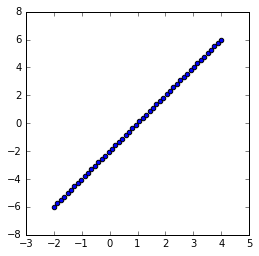

In [5]:
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

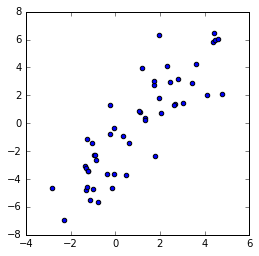

In [6]:
X += np.random.randn(2, num_examples)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

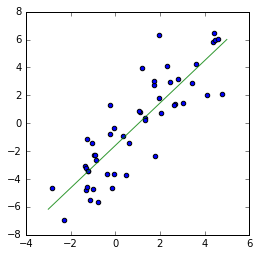

In [7]:
weights = np.polyfit(X[0], X[1], 1)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
line_x_range = (-3, 5)
plt.plot(line_x_range, [weights[1] + a * weights[0] for a in line_x_range], "g", alpha=0.8)
plt.show()